In [2]:
import pandas as pd
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 
df=pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# 1. Ndarim në X dhe y
X = df.drop(columns=["isAdult"])
y = df["isAdult"]

# 2. Ndarje në train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Bashkojmë X dhe y për train set
train_data = pd.concat([X_train, y_train], axis=1)

# 4. Ndarim klasat
adult = train_data[train_data["isAdult"] == 1]
not_adult = train_data[train_data["isAdult"] == 0]


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_3613/2212776706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


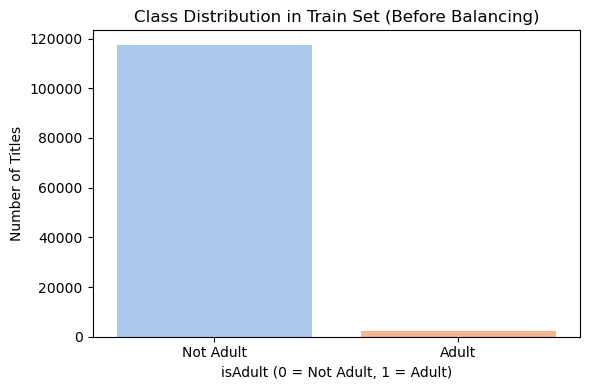

In [6]:
# Step 4: Count how many samples we have in each class
class_counts = train_data["isAdult"].value_counts()

# Step 5: Plot the class distribution before balancing
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.title("Class Distribution in Train Set (Before Balancing)")
plt.xlabel("isAdult (0 = Not Adult, 1 = Adult)")
plt.ylabel("Number of Titles")
plt.xticks([0, 1], ["Not Adult", "Adult"])
plt.tight_layout()
plt.show()

In [8]:
# Numërojmë sa tituj janë për çdo klasë në 'isAdult'
isadult_counts = df["isAdult"].value_counts()

# Printojmë rezultatin bukur
print(f"Jo Adult (0): {isadult_counts.get(0, 0)} titoli")
print(f"Adult (1): {isadult_counts.get(1, 0)} titoli")


Jo Adult (0): 146798 titoli
Adult (1): 2733 titoli


Classification report (Original dataset):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44045
           1       0.65      0.68      0.67       815

    accuracy                           0.99     44860
   macro avg       0.82      0.84      0.83     44860
weighted avg       0.99      0.99      0.99     44860



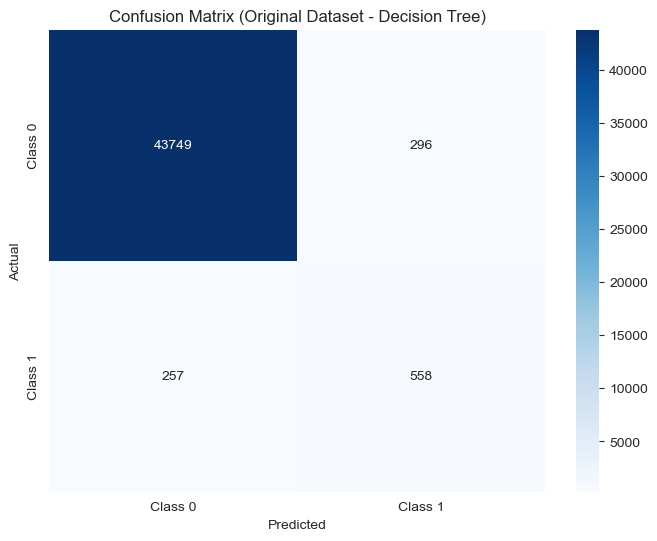

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Zgjedh vetëm kolonat numerike (si më parë)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Ndarja train-test pa asnjë sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Trajno modelin (pa balancing)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Parashiko
y_pred = dt.predict(X_test)

# Printo classification report
print("Classification report (Original dataset):")
print(classification_report(y_test, y_pred))

# Matrica e konfuzionit
cm = confusion_matrix(y_test, y_pred)

# Vizualizo
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Original Dataset - Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification report (Original dataset):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44045
           1       0.65      0.68      0.67       815

    accuracy                           0.99     44860
   macro avg       0.82      0.84      0.83     44860
weighted avg       0.99      0.99      0.99     44860



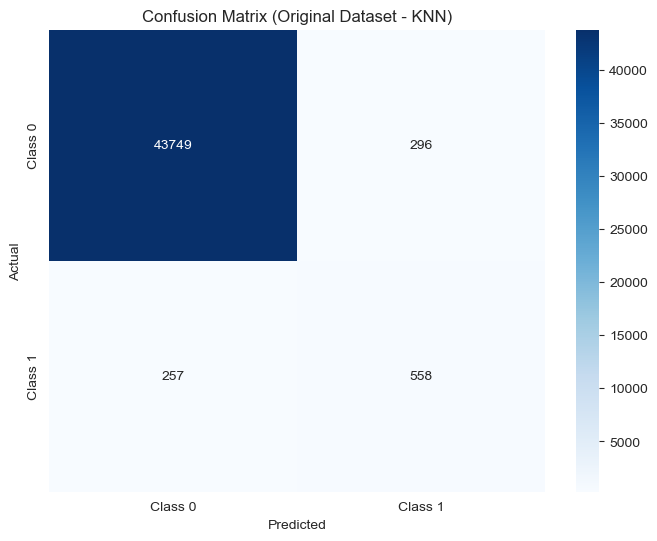

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Zgjedh vetëm kolonat numerike (si më parë)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Ndarja train-test pa asnjë sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Trajno modelin (pa balancing)
model = KNeighborsClassifier(n_neighbors=5)
dt.fit(X_train, y_train)

# Parashiko
y_pred = dt.predict(X_test)

# Printo classification report
print("Classification report (Original dataset):")
print(classification_report(y_test, y_pred))

# Matrica e konfuzionit
cm = confusion_matrix(y_test, y_pred)

# Vizualizo
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Original Dataset - KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Oversamplig

In [11]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Supozojmë që X janë të gjitha veçoritë dhe y është 'isAdult'
# Për shembull thjesht për këtë hap mund të përdorim vetë kolonën e target-it:
X = df.drop(columns=['isAdult'])
y = df['isAdult']

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Kontrollojmë shpërndarjen pas oversampling
print("Shpërndarja e klasave PAS Random Oversampling:")
print(Counter(y_resampled))


Shpërndarja e klasave PAS Random Oversampling:
Counter({0: 146798, 1: 146798})


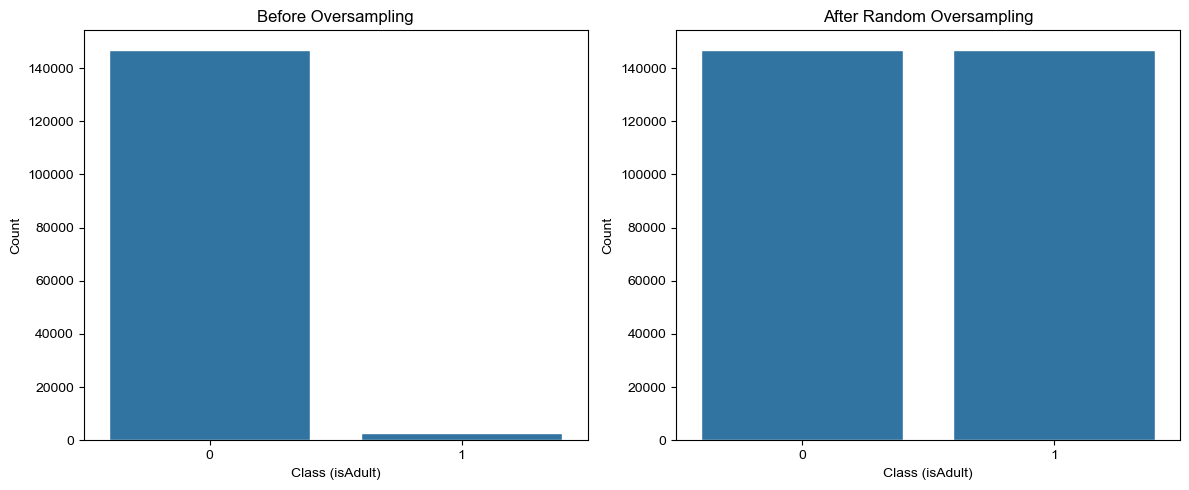

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Prepare original data
X = df.drop(columns=['isAdult'])
y = df['isAdult']

# Plot original class distribution
original_counts = Counter(y)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
resampled_counts = Counter(y_resampled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Plot original
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=axes[0])
axes[0].set_title("Before Oversampling")
axes[0].set_xlabel("Class (isAdult)")
axes[0].set_ylabel("Count")

# Plot resampled
sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), ax=axes[1])
axes[1].set_title("After Random Oversampling")
axes[1].set_xlabel("Class (isAdult)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Select only numeric columns for modeling
numeric_cols = X_resampled.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X_resampled[numeric_cols]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y_resampled, test_size=0.3, random_state=42
)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     43930
           1       0.99      1.00      1.00     44149

    accuracy                           1.00     88079
   macro avg       1.00      1.00      1.00     88079
weighted avg       1.00      1.00      1.00     88079



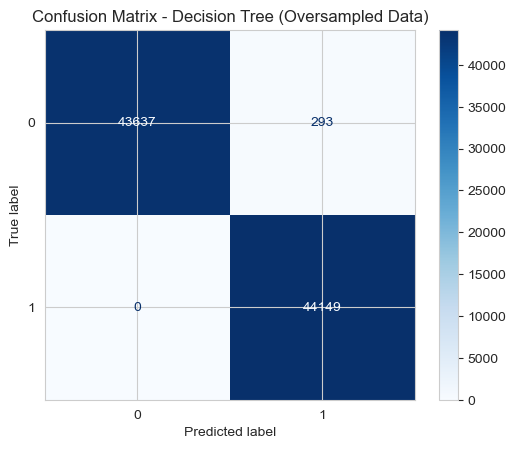

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree (Oversampled Data)")
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Use the same numeric features as before
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y_resampled, test_size=0.3, random_state=42
)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can try tuning k later
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Print classification report
print("Classification Report - KNN (Oversampled Data):")
print(classification_report(y_test, y_pred_knn))


Classification Report - KNN (Oversampled Data):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     43930
           1       0.97      1.00      0.98     44149

    accuracy                           0.98     88079
   macro avg       0.98      0.98      0.98     88079
weighted avg       0.98      0.98      0.98     88079



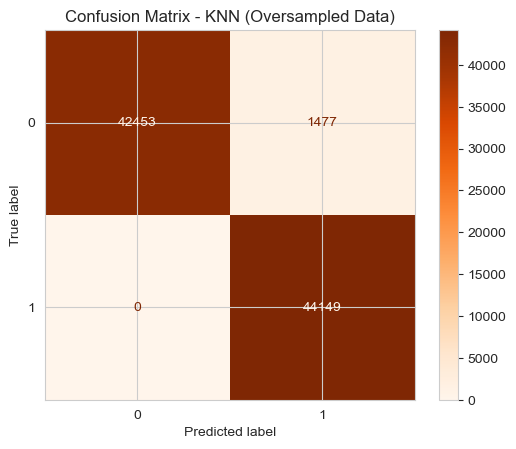

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - KNN (Oversampled Data)")
plt.show()


### smote

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Use only numeric features (as before)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Train-test split before SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show new class distribution after SMOTE
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 102753, 1: 102753})


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from collections import Counter

# Use only numeric features (as before)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Train-test split before SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show new class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


After SMOTE: Counter({0: 102753, 1: 102753})
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44045
           1       0.54      0.74      0.62       815

    accuracy                           0.98     44860
   macro avg       0.77      0.86      0.81     44860
weighted avg       0.99      0.98      0.98     44860



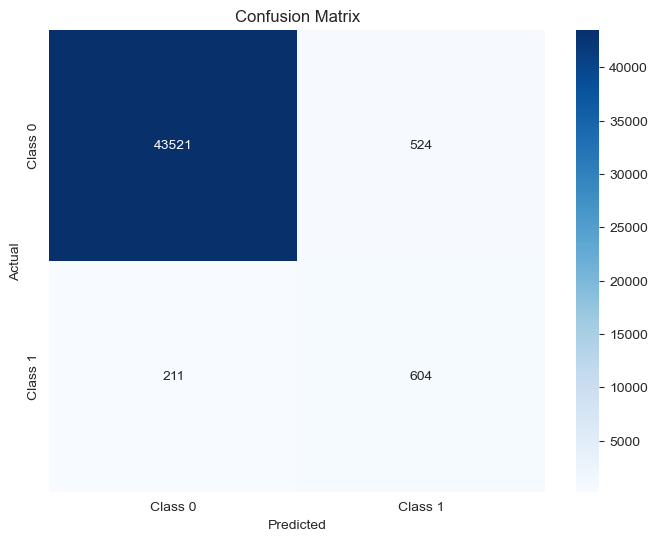

In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### KNN

In [35]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed
knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     44045
           1       0.21      0.79      0.33       815

    accuracy                           0.94     44860
   macro avg       0.60      0.87      0.65     44860
weighted avg       0.98      0.94      0.96     44860



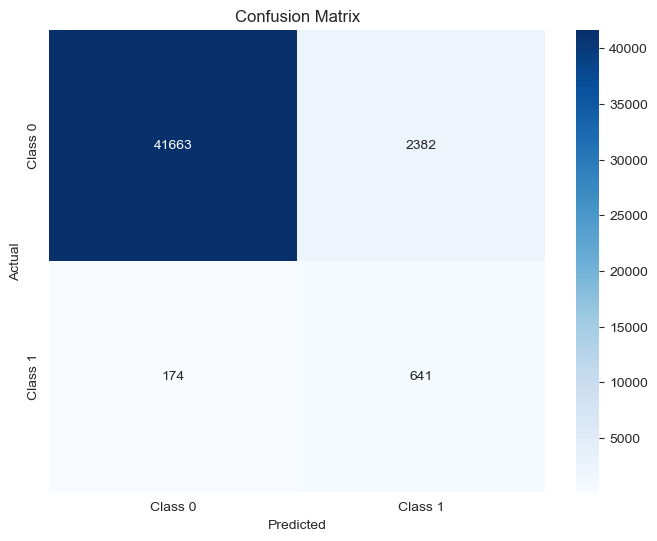

In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Undersampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Show new class distribution after under-sampling
print("After Random Under-sampling:", Counter(y_train_under))


After Random Under-sampling: Counter({0: 1918, 1: 1918})


After Random Under-sampling: Counter({0: 1918, 1: 1918})
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     44045
           1       0.18      0.92      0.30       815

    accuracy                           0.92     44860
   macro avg       0.59      0.92      0.63     44860
weighted avg       0.98      0.92      0.95     44860



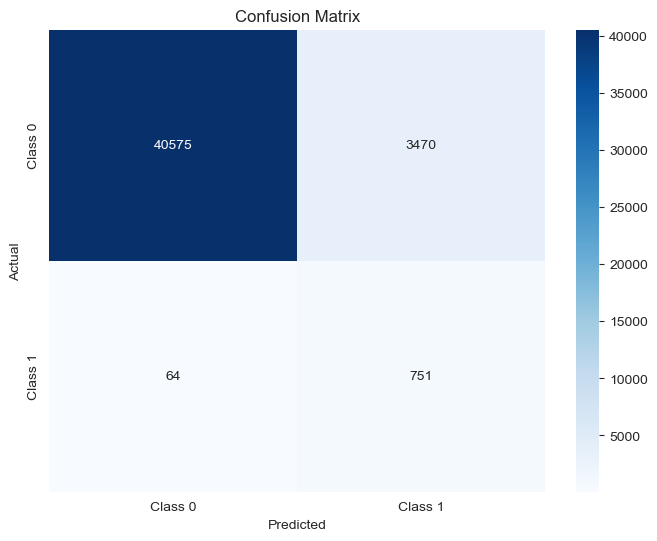

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Use only numeric features (as before)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Train-test split before under-sampling (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apply Random Under-sampling to balance the class distribution
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Show new class distribution after under-sampling
print("After Random Under-sampling:", Counter(y_train_under))

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.85      0.92     44045
           1       0.10      0.91      0.18       815

    accuracy                           0.85     44860
   macro avg       0.55      0.88      0.55     44860
weighted avg       0.98      0.85      0.91     44860



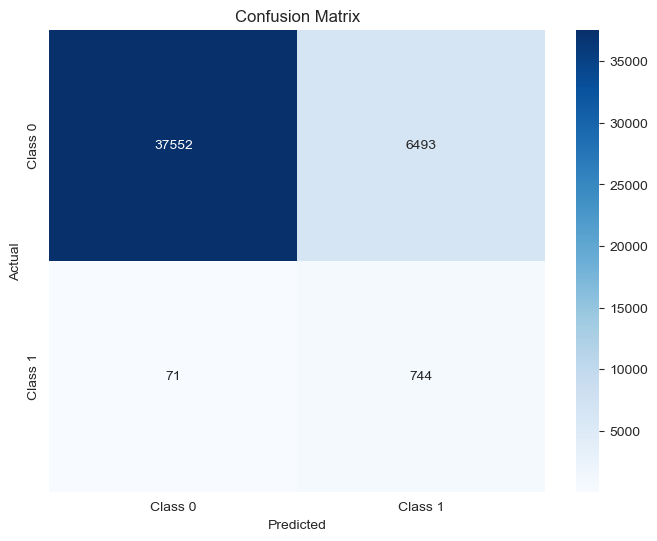

In [44]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed
knn.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Tomek

After Tomek Links Under-sampling: Counter({0: 102298, 1: 1918})
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44045
           1       0.60      0.44      0.51       815

    accuracy                           0.98     44860
   macro avg       0.80      0.72      0.75     44860
weighted avg       0.98      0.98      0.98     44860



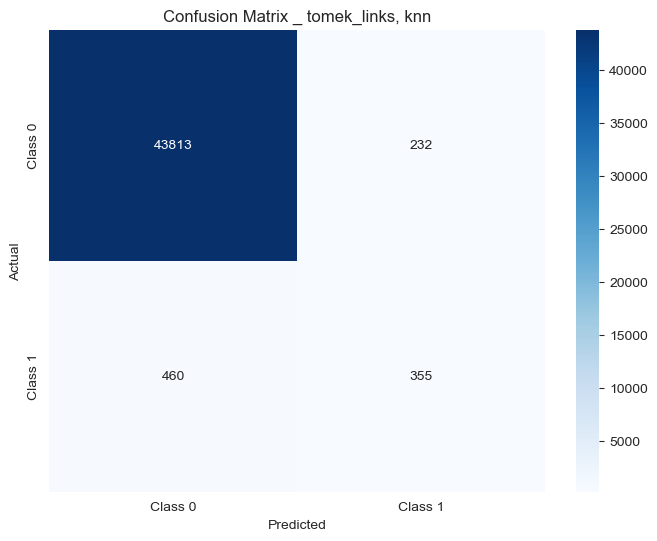

In [49]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Use only numeric features (as before)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Train-test split before under-sampling (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apply Tomek Links to balance the class distribution
tl = TomekLinks()
X_train_under, y_train_under = tl.fit_resample(X_train, y_train)

# Show new class distribution after Tomek Links
print("After Tomek Links Under-sampling:", Counter(y_train_under))

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed
knn.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix _ tomek_links, knn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


After Tomek Links Under-sampling: Counter({0: 102298, 1: 1918})
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44045
           1       0.65      0.70      0.67       815

    accuracy                           0.99     44860
   macro avg       0.82      0.85      0.83     44860
weighted avg       0.99      0.99      0.99     44860



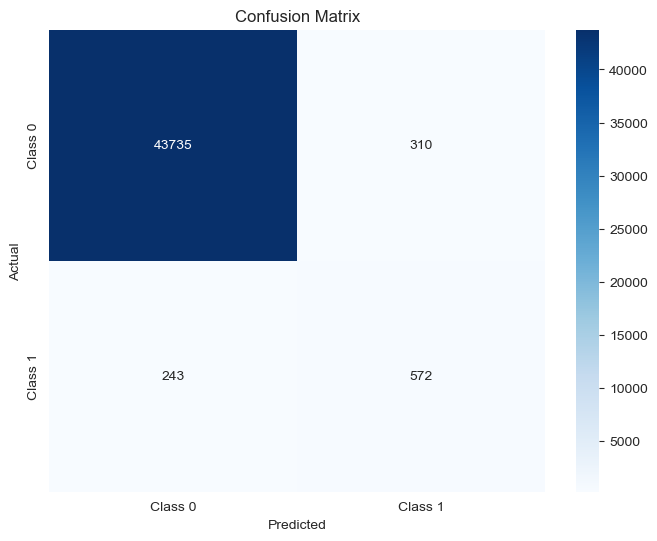

In [51]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Përdor vetëm veçoritë numerike
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Ndarja në trajnimi/test pa lejuar data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apliko Tomek Links për under-sampling
tl = TomekLinks()
X_train_under, y_train_under = tl.fit_resample(X_train, y_train)

# Shfaq shpërndarjen pas Tomek Links
print("After Tomek Links Under-sampling:", Counter(y_train_under))

# Trajno modelin Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_under, y_train_under)

# Parashiko në setin e testimit
y_pred = dt.predict(X_test)

# Raporti i klasifikimit
print(classification_report(y_test, y_pred))

# Matrica e konfuzionit
cm = confusion_matrix(y_test, y_pred)

# Vizualizo matricën e konfuzionit
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:
### Cluster centroid

After Cluster Centroids Under-sampling: Counter({0: 1918, 1: 1918})
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     44045
           1       0.05      0.97      0.09       815

    accuracy                           0.63     44860
   macro avg       0.52      0.79      0.43     44860
weighted avg       0.98      0.63      0.75     44860



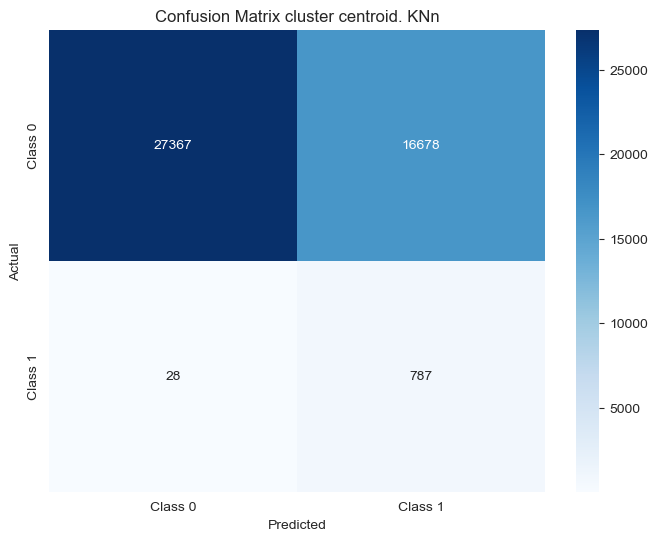

In [55]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Use only numeric features (as before)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_cols]

# Train-test split before under-sampling (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42
)

# Apply Cluster Centroids to balance the class distribution
cc = ClusterCentroids(random_state=42)
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)

# Show new class distribution after Cluster Centroids
print("After Cluster Centroids Under-sampling:", Counter(y_train_under))

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors if needed
knn.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix cluster centroid. KNn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.56      0.71     44045
           1       0.04      0.99      0.08       815

    accuracy                           0.56     44860
   macro avg       0.52      0.77      0.40     44860
weighted avg       0.98      0.56      0.70     44860



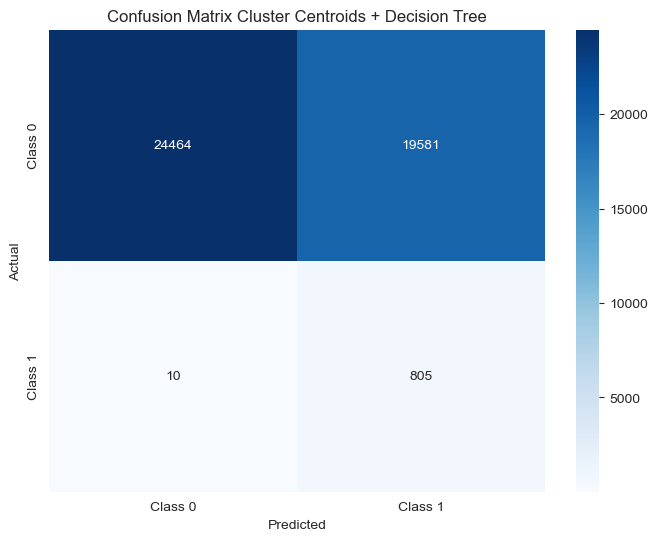

In [59]:
#Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Cluster Centroids + Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()